In [5]:
# Need only first time
#conda install -c conda-forge python-dotenv
#conda install -c conda-forge pydot

In [2]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import sys

sys.path.insert(1, '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2')
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 5)

-----------------
# Echonest EDA
-----------------
This dataset contains metrics provided by echonest. Those are private features computed using echonest algorithms.
The dataset has 3 main sub-datasets:
- audio_features
- metadata
- social_features
- temporal_features

## 1. Load Dataset
- echonest.csv: contains mid-level features for each track, provided by echonest;

In [3]:
echonest = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
echonest.shape

(13129, 249)

In [4]:
# check dataset
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [5]:
pip install lux

     |████████████████████████████████| 354 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 383 kB 6.9 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_ef254c0286ff4605905623056db34714/setup.py'"'"'; __file__='"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_ef254c0286ff4605905623056db34714/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-pip-egg-info-wk22nb3f
         cwd: /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_

     |████████████████████████████████| 377 kB 10.7 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_d906e7777f814921a63c1cfbe5a8b116/setup.py'"'"'; __file__='"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_d906e7777f814921a63c1cfbe5a8b116/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-pip-egg-info-3t23gsaq
         cwd: /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_d906e7777f814921a63c1cfbe5a8b116/
    Complete output (23 lines):
    running egg_info
    creating /private/var/folders/kp/8mnpmyqn13j

     |████████████████████████████████| 367 kB 17.3 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_62791ec640004e20a6fb511b59fcc674/setup.py'"'"'; __file__='"'"'/private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_62791ec640004e20a6fb511b59fcc674/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-pip-egg-info-u8vt0alb
         cwd: /private/var/folders/kp/8mnpmyqn13jc_xv8jsjv1tf80000gn/T/pip-install-g_okjcuv/psycopg2_62791ec640004e20a6fb511b59fcc674/
    Complete output (23 lines):
    running egg_info
    creating /private/var/folders/kp/8mnpmyqn13j

In [4]:
pip install lux-api==0.2.3

     |████████████████████████████████| 94 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 727 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 15.8 MB/s eta 0:00:01


  Created wheel for lux-api: filename=lux_api-0.2.3-py3-none-any.whl size=146693 sha256=03f7ec21ebb255557e83d7a208f8a92b8b6f2a9c29eb6e11ae8f329fc253b139
  Stored in directory: /Users/gaetanoantonicchio/Library/Caches/pip/wheels/1f/7d/6c/188b2a11db0c9893299e592cc4d8082fa957cf73c2d13f1e8e
  Created wheel for lux-widget: filename=lux_widget-0.1.4-py3-none-any.whl size=4294795 sha256=6ce635eb84fdc7dba024de544645983aabb5ed1716108297f0ae50f48e50dcd3
  Stored in directory: /Users/gaetanoantonicchio/Library/Caches/pip/wheels/e7/61/3c/acb94341081e494f5591c46647ea273bbce2a804731067d13b
Successfully built lux-api lux-widget
Note: you may need to restart the kernel to use updated packages.


In [23]:
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install luxwidget

SyntaxError: invalid syntax (<ipython-input-23-783680764391>, line 1)

In [6]:
data =pd.read_csv('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types.S

In [10]:
data.dropna(axis=0, inplace=True)

In [12]:
data[['echonest','echonest.1']]

,echonest,echonest.1
6,0.9516699648,0.6581786543
54,0.9337410350,0.3127198225
199,0.3423262003,0.1760942769
200,0.3049734899,0.0776074462
202,0.0005734873,0.2806028598
...,...,...
12765,0.735016,0.654465
12987,0.000004,0.303615
13011,0.995699,0.699354
13110,0.992387,0.606253


---------
### Partition: Echonest - Audio Features
---------
#### 1. Data Understanding

In [9]:
print('**** Available data (%) ****\n echonest.csv - audio_features')
((abs(echonest['echonest','audio_features'].isnull().sum()-\
      echonest['echonest','audio_features'].shape[0])\
  /echonest['echonest','audio_features'].shape[0])*100).round(2).sort_values(ascending=False)

**** Available data (%) ****
 echonest.csv - audio_features


acousticness        100.0
danceability        100.0
energy              100.0
instrumentalness    100.0
liveness            100.0
speechiness         100.0
tempo               100.0
valence             100.0
dtype: float64

There are no missing values.

In [10]:
# extract dataset - partition: audio_features
audio_features_dataset = echonest['echonest','audio_features'].copy()

In [11]:
# general statistics
audio_features_dataset.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [12]:
# check data type
audio_features_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      13129 non-null  float64
 1   danceability      13129 non-null  float64
 2   energy            13129 non-null  float64
 3   instrumentalness  13129 non-null  float64
 4   liveness          13129 non-null  float64
 5   speechiness       13129 non-null  float64
 6   tempo             13129 non-null  float64
 7   valence           13129 non-null  float64
dtypes: float64(8)
memory usage: 923.1 KB


##### Correlation Matrix

Text(0.5, 1.0, 'Correlation matrix audio features')

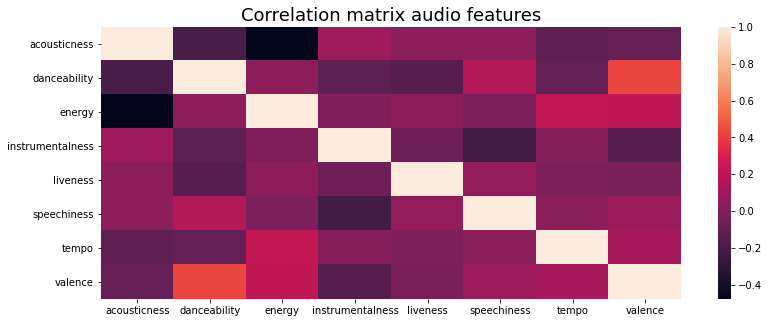

In [13]:
corr_audiofeat = audio_features_dataset.corr()
sns.heatmap(corr_audiofeat)
plt.title('Correlation matrix audio features', fontsize=18)

##### Attaching labels:$\;\;$ **genre_top**

In [14]:
# load labels of top_genres
genre_labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/Data/Labels [generated]/labels_genre_top.csv')
genre_labels.set_index('track_id', inplace=True)
genre_labels.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/Data/Labels [generated]/labels_genre_top.csv'

In [ ]:
# Attach genre_labels to audio_features_dataset
audio_features_dataset = audio_features_dataset.merge(genre_labels,on="track_id")
# display dataset
audio_features_dataset.head()

In [ ]:
# check for missing values in genre_top
print(f"Missing values in genre_top: {audio_features_dataset.genre_top.isnull().sum()}")

In [ ]:
# removing missing values
audio_features_dataset.dropna(inplace=True)

In [ ]:
# check effectiveness of drop
audio_features_dataset.isnull().sum()

## 3. Data Visualization
#### Audio features vs Top Genres

In [ ]:
# normalize dataset audio_features_dataset for visualization in radar plot
# the dataset audio_features_dataset_norm will be deleted after plotting
audio_features_dataset_norm = audio_features_dataset.copy()
audio_features_dataset_norm.iloc[:,0:8] = (audio_features_dataset_norm.iloc[:,0:8]\
                                           -audio_features_dataset_norm.iloc[:,0:8].min())\
                                          /(audio_features_dataset_norm.iloc[:,0:8].max()\
                                            -audio_features_dataset_norm.iloc[:,0:8].min())
audio_features_dataset_norm.head()

In [ ]:
# radar chart
genr_lst = audio_features_dataset_norm['genre_top'].unique().tolist()
colors = ["red", "green", "blue", "goldenrod", "magenta",'orange','purple',
          'black','lightblue','coral','darkgreen','brown']

for genre,color in zip(genr_lst,colors):
    metr = audio_features_dataset_norm[audio_features_dataset_norm['genre_top']==genre].describe().loc['mean'].tolist()
    theta=['acousticness','danceability','energy','instrumentalness',
           'liveness', 'tempo','speechiness','valence']

    fig = px.line_polar(audio_features_dataset_norm,
                        r=metr,
                        theta=theta,
                        line_close=True,
                        title=genre,
                        color_discrete_sequence=[color])
    fig.update_traces(fill='toself')
    fig.update_layout(
    title={
        'text': genre,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

    fig.show()

#### Box plots: Audio Features

In [ ]:
# boxplots - echonest features
tempo = go.Box(y=audio_features_dataset_norm['tempo'],name='tempo')
liveness = go.Box(y=audio_features_dataset_norm['liveness'],name='liveness')
acousticness = go.Box(y=audio_features_dataset_norm['acousticness'],name='acousticness')
danceability = go.Box(y=audio_features_dataset_norm['danceability'],name='danceability')
energy = go.Box(y=audio_features_dataset_norm['energy'],name='energy')
instrumentalness = go.Box(y=audio_features_dataset_norm['instrumentalness'],name='instrumentalness')
speechiness = go.Box(y=audio_features_dataset_norm['speechiness'],name='speechiness')
valence = go.Box(y=audio_features_dataset_norm['valence'], name='valence')


data = [acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence]
layout=go.Layout(title='Box-plots echonest features')
go.Figure(data=data, layout=layout)

In [ ]:
sns.pairplot(audio_features_dataset_norm,hue='genre_top')

-------
## Partition: Metadata
------

In [ ]:
# extract dataset - partition: metadata
metadata_echo = echonest['echonest','metadata']
metadata_echo.head()

#### Data Understanding

In [ ]:
#check shape
metadata_echo.shape

In [ ]:
# check missing values
metadata_echo.isnull().sum()

In [ ]:
# drop missing values
metadata_echo.dropna(inplace=True)

In [ ]:
# check effectiveness drop
metadata_echo.isnull().sum()

In [ ]:
metadata_echo.info()

#### Data Visualization

In [ ]:
# geo-scatter plot
fig = px.scatter_geo(metadata_echo,
                     lat='artist_latitude',
                    lon='artist_longitude',
                     color="artist_location", # which column to use to set the color of markers
                     projection="natural earth",
                     title='Distribution of artists along the globe'
                    )
fig.show()

Majority of tracks are produced in the West part.

In [ ]:
# histogram #tracks per artist (considering all of them)
artist_plot = px.histogram(metadata_echo, x="artist_name",title='tracks per artist')
artist_plot.show()

-------
## Partition: Social Features
______

In [ ]:
# load dataset
social_features_dataset = echonest['echonest','social_features']
social_features_dataset.head()

### 1. Data Visualization
#### a) Artist familiarity vs Song hotness and currency

In [ ]:
fig, ax= plt.subplots()
sns.scatterplot(x=social_features_dataset['artist_hotttnesss'],
                y=social_features_dataset['song_hotttnesss'],
                hue=social_features_dataset['song_currency'],
                palette="flare"
                )
ax.axhline(y=0.16, linestyle='-',color='red',label='popularity threshold')
plt.legend()
plt.xlabel("Artist Hotness", fontsize=18)
plt.ylabel("Song Hotness", fontsize=18)

Apart from tracks with 0 **artist_hotttnesss** and 0 **song_hotttnesss**, the two variable appear to be
positively correlated. As the artist gains familiarity among the audience, their song are considered to be hot. <br>
Should be interesting to create a label **song popularity** that takes value **"popular"** if the **artist_hotttnesss >0.4**
& **song_hotttnesss >0.15**.<br>
The hottess songs are the ones with high **song_currency** (> 0.2) as we can see from the graph.

#### b) Listens vs Song hotness

In [ ]:
# importing data about listens from tracks.csv
tracks = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')
track_listens = tracks['track'][['listens']]
social_features_dataset=social_features_dataset.merge(track_listens, on='track_id')
#social_features_dataset.head()

In [ ]:
# plot relationship listens - song hotness
fig, ax= plt.subplots()
sns.scatterplot(x=social_features_dataset['song_hotttnesss'],
                y=social_features_dataset['listens'],
                hue=social_features_dataset['song_currency'],
                palette="flare"
                )
plt.xlabel("Song Hotness", fontsize=18)
plt.ylabel("#Listens", fontsize=18)

Tracks that are both current and hot have less than 100k listens. <br>
We can observe how songs that are not hot have more listens than current ones, probably due
to the fact that they've been out for a longer time. <br>
Tot number of listen doesn't appear to be a good estimator of a song popularity.

## 2. Feature engineering:$\;\;$ Song popularity
This label is determined by looking at the values in song_hotttnesss and artist_hotttnesss.<br><br>
We assigned label **popular** if song_hotttnesss & artist_hotttnesss were >= 0.15 and >= 0.4 respectively, else
we assigned the label **not popular**

In [ ]:
# generating new label: song_popularity
social_features_dataset['song_popularity'] = np.where( ( (social_features_dataset['song_hotttnesss'] >= 0.15) & (social_features_dataset['artist_hotttnesss'] >= 0.4 ) ), 'popular', 'not popular')

In [ ]:
#social_features_dataset.head()

In [ ]:
social_features_dataset.song_popularity.value_counts()

In [ ]:
# labels
song_popularity_labels = social_features_dataset[['song_popularity']]

## 3. Data Visualization of Echonest audio_features vs song_popularity
**What makes a song popular? What characteristics does it have? What genre is most popular?**

In [ ]:
audio_features_dataset_norm = audio_features_dataset_norm.merge(song_popularity_labels, on='track_id')
audio_features_dataset_norm.head()

### a) Energy score for popular songs
Majority of popular songs have high values for energy (> 0.7)

In [ ]:
sns.histplot(audio_features_dataset_norm[audio_features_dataset_norm['song_popularity']=='popular'],x= 'energy',hue='song_popularity',bins=100 )

### b) Audio features vs song popularity$\;\;$Radar chart

In [ ]:
metr0 = audio_features_dataset_norm[audio_features_dataset_norm['song_popularity']=='popular'].describe().loc['mean'].tolist()
metr1 = audio_features_dataset_norm[audio_features_dataset_norm['song_popularity']=='not popular'].describe().loc['mean'].tolist()
categories =['acousticness','danceability','energy','instrumentalness',
           'liveness', 'tempo','speechiness','valence']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=metr0,
      theta=categories,
      fill='toself',
      name='popular'
))
fig.add_trace(go.Scatterpolar(
      r=metr1,
      theta=categories,
      fill='toself',
      name='not popular'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.7]
    )),
  showlegend=True
)

fig.show()